## Control Variables
- Resolution = 0.25
- ROBOT_RADIUS = 0.25
- NUM_OF_AGENT = 10
- ANN Samples = 199

### ANN with Optimiser

In [1]:
import BayesianOptimisation.boVoronoiDirected as boVoronoiDirected
import BayesianOptimisation.expGrid as expGrid
import BayesianOptimisation.expVoronoi as expVoronoi
import BayesianOptimisation.ANNVoronoiDirected as ANNVoronoiDirected
import BayesianOptimisation.experiment_setup as experiment
from core.DataStructure import *

from importlib import reload
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import copy

In [2]:
from scipy.optimize import minimize, Bounds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Reshape
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

In [3]:
np.random.seed(9) 

### Data Processing

In [4]:
x_sz = 40
y_sz = 450

In [5]:
X_read = pd.read_csv("./data/gen-starts-ends/X.csv")
X = X_read.to_numpy()
X = X.reshape((-1,40))
X.shape

(199, 40)

In [6]:
y_read = pd.read_csv("./data/gen-starts-ends/Y.csv")
y = y_read.to_numpy()
y = y.reshape((199,-1))
y.shape

(199, 450)

In [7]:
x_train_temp, x_test, y_train_temp, y_test = train_test_split(
    X, y, test_size=0.1, random_state=4
)
x_train, x_val, y_train, y_val = train_test_split(
    x_train_temp, y_train_temp, test_size=0.11, random_state=4
)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scalerx = MinMaxScaler()
scalery = MinMaxScaler()
x_train_norm = scalerx.fit_transform(x_train)
y_train_norm = scalery.fit_transform(y_train)
x_val_norm = scalerx.fit_transform(x_val)
y_val_norm = scalery.fit_transform(y_val)
x_test_norm = scalerx.fit_transform(x_test)
y_test_norm = scalery.fit_transform(y_test)

# inverse = scaler.inverse_transform(normalized)

In [35]:
x_train_norm = x_train_norm.reshape((-1,1,x_sz))
x_test_norm = x_test_norm.reshape((-1,1,x_sz))
x_val_norm = x_val_norm.reshape((-1,1,x_sz))

### ANN

In [36]:
np.random.seed(9)
tf.random.set_seed(9)
model = keras.models.Sequential([
    Dense(units=128, activation='relu', kernel_initializer='normal', input_shape=(1,x_sz)),
    Dropout(0.2),
    Dense(units=256, activation='relu',),
    Dropout(0.2),
    Dense(units=512, activation='relu',),
    Dropout(0.1),
    Dense(units=512, activation='relu',),
    Dropout(0.05),
    Dense(units=y_sz, activation='sigmoid'),
])

opt = keras.optimizers.Adam(learning_rate=1e-6)
model.compile(
    loss="mean_squared_error", 
    optimizer=opt,
    metrics=["accuracy"])

In [37]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 1, 128)            5248      
_________________________________________________________________
dropout_17 (Dropout)         (None, 1, 128)            0         
_________________________________________________________________
dense_23 (Dense)             (None, 1, 256)            33024     
_________________________________________________________________
dropout_18 (Dropout)         (None, 1, 256)            0         
_________________________________________________________________
dense_24 (Dense)             (None, 1, 512)            131584    
_________________________________________________________________
dropout_19 (Dropout)         (None, 1, 512)            0         
_________________________________________________________________
dense_25 (Dense)             (None, 1, 512)           

In [38]:
checkpoint_filepath = './data/gen-starts-ends/model/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='loss',
    mode='min',
    save_best_only=True)

In [39]:
history = model.fit(x_train_norm, 
    y_train_norm,
    batch_size = 32,
    epochs=200,
    shuffle=True,
    validation_data=(x_val_norm, y_val_norm),
    callbacks=[model_checkpoint_callback])

Epoch 1/200
5/5 [==============================] - 0s 86ms/step - loss: 0.0840 - accuracy: 0.0000e+00 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 2/200
5/5 [==============================] - 0s 41ms/step - loss: 0.0840 - accuracy: 0.0000e+00 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 3/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0840 - accuracy: 0.0000e+00 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 4/200
5/5 [==============================] - 0s 43ms/step - loss: 0.0840 - accuracy: 0.0000e+00 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 5/200
5/5 [==============================] - 0s 40ms/step - loss: 0.0840 - accuracy: 0.0000e+00 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 6/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0840 - accuracy: 0.0000e+00 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 7/200
5/5 [==============================] - 0s 32ms/step - loss: 0.0840 - accuracy: 0.0000e+00 - val_loss

5/5 [==============================] - 0s 44ms/step - loss: 0.0839 - accuracy: 0.0000e+00 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 57/200
5/5 [==============================] - 0s 45ms/step - loss: 0.0839 - accuracy: 0.0000e+00 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 58/200
5/5 [==============================] - 0s 38ms/step - loss: 0.0839 - accuracy: 0.0000e+00 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 59/200
5/5 [==============================] - 0s 62ms/step - loss: 0.0839 - accuracy: 0.0000e+00 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 60/200
5/5 [==============================] - 0s 62ms/step - loss: 0.0839 - accuracy: 0.0000e+00 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 61/200
5/5 [==============================] - 0s 59ms/step - loss: 0.0839 - accuracy: 0.0000e+00 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 62/200
5/5 [==============================] - 0s 48ms/step - loss: 0.0839 - accuracy: 0.0000e+00 - val_loss: 0.09

Epoch 111/200
5/5 [==============================] - 0s 53ms/step - loss: 0.0839 - accuracy: 0.0000e+00 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 112/200
5/5 [==============================] - 0s 39ms/step - loss: 0.0839 - accuracy: 0.0000e+00 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 113/200
5/5 [==============================] - 0s 32ms/step - loss: 0.0839 - accuracy: 0.0000e+00 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 114/200
5/5 [==============================] - 0s 48ms/step - loss: 0.0839 - accuracy: 0.0000e+00 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 115/200
5/5 [==============================] - 0s 32ms/step - loss: 0.0839 - accuracy: 0.0000e+00 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 116/200
5/5 [==============================] - 0s 35ms/step - loss: 0.0839 - accuracy: 0.0000e+00 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 117/200
5/5 [==============================] - 0s 38ms/step - loss: 0.0839 - accuracy: 0.0000e

5/5 [==============================] - 0s 28ms/step - loss: 0.0839 - accuracy: 0.0000e+00 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 166/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0839 - accuracy: 0.0000e+00 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 167/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0839 - accuracy: 0.0000e+00 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 168/200
5/5 [==============================] - 0s 27ms/step - loss: 0.0839 - accuracy: 0.0000e+00 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 169/200
5/5 [==============================] - 0s 30ms/step - loss: 0.0839 - accuracy: 0.0000e+00 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 170/200
5/5 [==============================] - 0s 42ms/step - loss: 0.0839 - accuracy: 0.0000e+00 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 171/200
5/5 [==============================] - 0s 49ms/step - loss: 0.0838 - accuracy: 0.0000e+00 - val_loss

In [40]:
model.load_weights(checkpoint_filepath)

In [41]:
test = model.predict(x_test_norm[0])
test
scalery.inverse_transform(test)

array([[ 0.5081441 ,  0.5008192 ,  0.5064195 ,  0.49524   ,  0.47375044,
         0.487626  ,  0.51203805,  0.52904665,  0.5005556 ,  0.51284057,
         0.512905  ,  0.4975343 ,  0.4691856 ,  0.4958635 ,  0.5008346 ,
         0.49743855,  0.4707895 ,  0.49453372,  0.44534266,  0.47127578,
         0.42555752,  0.4730156 ,  0.48884875,  0.46123576,  0.52298284,
         0.55312186,  0.49249998,  0.47106916,  0.50503784,  0.5231634 ,
         0.5227557 ,  0.5050683 ,  0.50458896,  0.5846054 ,  0.5739945 ,
         0.5642071 ,  0.508358  ,  0.54737264,  0.5303783 ,  0.4941168 ,
         0.5033457 ,  0.4442489 ,  0.51063615,  0.52669704,  0.51494855,
         0.576257  ,  0.51148343,  0.47323254,  0.49839187,  0.469989  ,
         0.47087803,  0.49260566,  0.5087659 ,  0.52471495,  0.5238496 ,
         0.4676492 ,  0.48467198,  0.459445  ,  0.5328232 ,  0.49068558,
         0.47748536,  0.5058846 ,  0.46206918,  0.508134  ,  0.52897096,
         0.5227722 ,  0.4680704 ,  0.5354134 ,  0.4

In [ ]:
# model.save('./data/100-samples/model')

### Visualize

In [44]:
locations = scalerx.inverse_transform(x_test_norm[0])
locations = locations.reshape((-1,4))
locations 

array([[26.,  4., 32., 31.],
       [29.,  6., 30., 25.],
       [ 2., 12., 18., 31.],
       [19., 13., 26., 16.],
       [30., 27., 25., 14.],
       [15., 26., 21.,  7.],
       [21.,  2., 21., 20.],
       [29.,  2., 19., 25.],
       [10., 11., 19., 21.],
       [21.,  9., 25.,  3.]])

In [46]:
probabilities = model.predict(x_test_norm[0])
probabilities

array([[0.4998759 , 0.5022603 , 0.50444293, 0.5054364 , 0.50451005,
        0.5096098 , 0.498347  , 0.51121473, 0.50103515, 0.49416572,
        0.51572806, 0.50204825, 0.49405885, 0.49424872, 0.50306445,
        0.50782496, 0.49350715, 0.48996776, 0.4992358 , 0.50529695,
        0.49258953, 0.5034784 , 0.49215654, 0.4974272 , 0.5096365 ,
        0.49350777, 0.4914013 , 0.5092481 , 0.5050171 , 0.5013909 ,
        0.50365484, 0.49650392, 0.50528556, 0.5140095 , 0.48852426,
        0.49993935, 0.49870545, 0.49499154, 0.50515014, 0.49478567,
        0.49260676, 0.49748322, 0.5011074 , 0.5032714 , 0.5113794 ,
        0.51416653, 0.4875657 , 0.4966709 , 0.49255764, 0.50072974,
        0.49883655, 0.49942085, 0.50231016, 0.49923596, 0.49901715,
        0.5110032 , 0.49384642, 0.49936998, 0.4992383 , 0.4937159 ,
        0.5012424 , 0.49266836, 0.49932525, 0.5050574 , 0.49786174,
        0.50199944, 0.49918953, 0.504401  , 0.500132  , 0.4986022 ,
        0.49933016, 0.5042754 , 0.49373835, 0.49

In [27]:
scene = "./input/random-32-32-10/scen-even/random-32-32-10-even-" + str(DATASET) + ".scen"
exp = experiment.Experiment(scene=scene)

In [28]:
output = ANNVoronoiDirected.get_results(probabilities, exp)

vordir_paths, vordir_cost, vordir_ft, vordir_u1, vordir_u2, vordir_con, vordir_conmax, vordir_conavg, vordir_G0, vordir_G, vordir_thres = output

removed num of points 79
num of points remained 444
Set Hyper Parameters, solving for 10 agents
total number of distance 447
Number of trainable probabilities 388
Length cutoff threshold 2


Black px 106306 White px 80318


0.5696266289437586

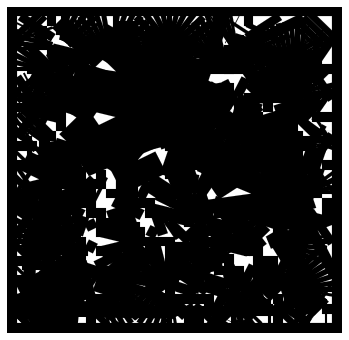

In [40]:
vordir_u2 = getCoverage(exp,vordir_G, directed = True)

In [45]:
results = [vordir_cost, vordir_ft, vordir_u1, vordir_u2, vordir_conmax, vordir_conavg, vordir_thres]
pd.DataFrame([results],columns=['cost','vordir_ft','vordir_u1','vordir_u2','vordir_max', 'vordir_avg','subgraph'])

,cost,vordir_ft,vordir_u1,vordir_u2,vordir_max,vordir_avg,subgraph
0,71.178416,21.781828,0.305017,0.569627,3.0,0.625,0.003052


In [34]:
def showAccSolution(result_graph, paths, image, nodes, start_nodes, end_nodes, all_path = True, path_num = 0):
    edges_in_path = []
    image2 = 1-image
    fig, ax = plt.subplots(figsize=(12,12))
    img = np.array(1-image)
    ax = sb.heatmap(img)
    assigned = {}
    
    for index, path in enumerate(paths):
#         path = paths[path_num]
        for ite in range(len(path)-1):
            edges_in_path.append(np.array([path[ite],path[ite+1],0]))
            p1 = result_graph.nodes[path[ite]]['position']
            p2 = result_graph.nodes[path[ite+1]]['position']

            for r in (p1.x, p2.x, 1):
                for c in (p1.y, p2.y, 1):
                    if (Point(r,c) in np.array(nodes)[end_nodes]):
                        image2[int(r),int(c)] = 1
                    else:
                        image2[int(r),int(c)] += 0.2

        drawn = {}
        loop = result_graph.edges if all_path else edges_in_path

        for elem in loop:
            cur = result_graph.edges[elem[0], elem[1], 0]['probability']
            opposite = result_graph.edges[elem[1], elem[0], 0]['probability']
            unused = 1 - cur - opposite
            scaler = 0.7
            if cur > opposite:
                p1 = result_graph.nodes[elem[0]]['position']
                arr1 = np.array([p1.x,p1.y])
                p2 = result_graph.nodes[elem[1]]['position']
                arr2 = np.array([p2.x,p2.y])
                direction = (arr2-arr1) / np.linalg.norm(arr2 - arr1)
                mag = np.linalg.norm(arr2 - arr1)*scaler
                dx, dy = mag*direction
            else:
                p1 = result_graph.nodes[elem[1]]['position']
                arr1 = np.array([p1.x,p1.y])
                p2 = result_graph.nodes[elem[0]]['position']
                arr2 = np.array([p2.x,p2.y])
                direction = (arr2-arr1) / np.linalg.norm(arr2 - arr1)
                mag = np.linalg.norm(arr2 - arr1)*scaler
                dx, dy = mag*direction
            
            # only draw arrow once
            if frozenset((p1.y, p1.x, dy, dx)) not in assigned.keys():
                plt.arrow(p1.y, p1.x, dy, dx, head_width = 0.35, alpha=0.9, color = 'grey', linewidth=1)
                assigned[frozenset((p1.y, p1.x, dy, dx))] = 1
            
#         p = start_nodes[index]
#         plt.scatter(nodes[p].y, nodes[p].x, color = 'red', linewidths=5)
#         p = end_nodes[index]
#         plt.scatter(nodes[p].y, nodes[p].x, color = 'lime', linewidths=5)
#         name = './results/vordir_path'+ str(path_num)+'.png'
#         plt.gca().invert_yaxis()
#         plt.savefig(name)
        
    for p in start_nodes:
        plt.scatter(nodes[p].y, nodes[p].x, color = 'red', linewidths=5)
    for p in end_nodes:
        plt.scatter(nodes[p].y, nodes[p].x, color = 'lime', linewidths=5)

#     name = './data/'+ 'ANN' +'.png'
    plt.gca().invert_yaxis()
#     plt.savefig(name)
    return fig

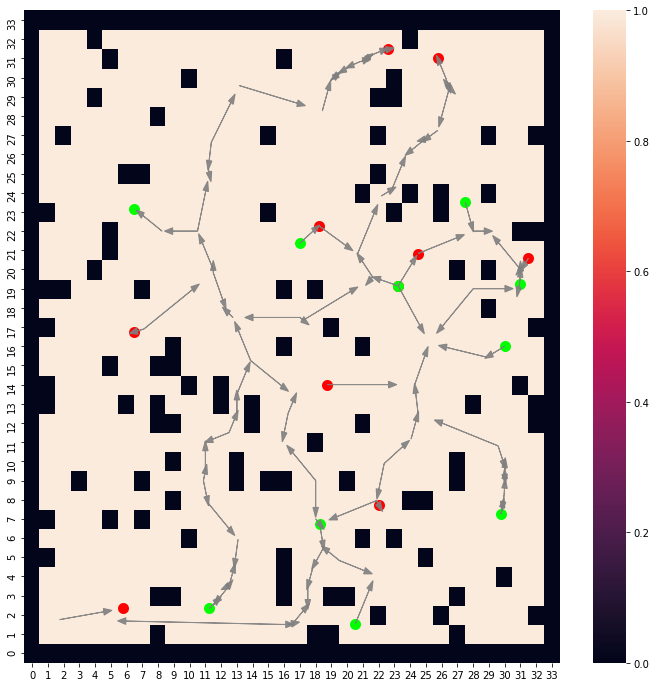

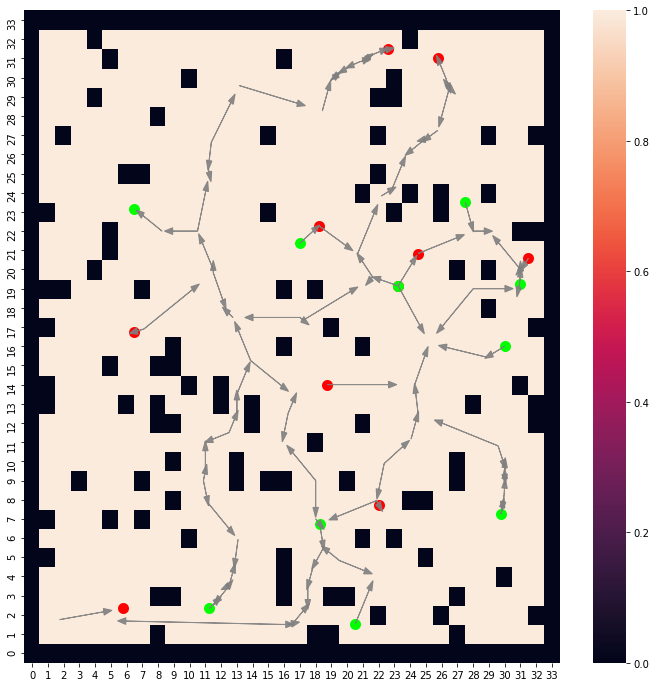

In [35]:
showAccSolution(vordir_G0, 
                vordir_paths, 
                exp.image, 
                exp.nodes, 
                exp.start_nodes, 
                exp.end_nodes, 
                all_path = False, 
                path_num = 0) #path_num variables is unused

In [37]:
def getCoverage(exp, G, directed = False):
    total_area = 0
    total_dist = 0
    assigned = {}
    fig, ax = plt.subplots(figsize=(6,6))
    plt.xlim(0,34)
    plt.ylim(0,34)
    count = 0
    for n in G.nodes:
        for e in G.neighbors(n):
            if n != e and frozenset((n, e)) not in assigned.keys():
                
                p1 = G.nodes[n]['position']
                p2 = G.nodes[e]['position']
                
                if (directed):
                    d = G.edges[n,e,0]['distance']
                    c = G.edges[n,e,0]['capacity']
                else:
                    d = G.edges[n,e]['distance']
                    c = G.edges[n,e]['capacity']
                
                
                assigned[frozenset((n, e))] = 1

                adjustp1 = Point(p1.y, p1.x)
                adjustp2 = Point(p2.y, p2.x)

                refpt1 = adjustp1 if adjustp1.y <= adjustp2.y else adjustp2
                refpt2 = adjustp1 if adjustp1.y > adjustp2.y else adjustp2

                if refpt1.x >= refpt2.x:
                    theta_rot = np.pi - np.arctan(abs(refpt1.y - refpt2.y)/abs(refpt1.x - refpt2.x))
                else:
                    theta_rot = np.arctan(abs(refpt1.y - refpt2.y)/abs(refpt1.x - refpt2.x))

                if theta_rot >= np.pi/2:
                    theta = theta_rot - np.pi/2
                else:
                    theta = theta_rot + np.pi/2

                dy = -(c/2)*np.sin(theta)
                if refpt1.y == refpt2.y:
                    dx = 0
                    width = d
                    height = c
                    a = 0
                elif refpt1.x > refpt2.x:
                    dx = -(c/2)*np.cos(theta)
                    width = c
                    height = d
                    a = (theta) * 180 / np.pi
                elif refpt1.x == refpt2.x:
                    dx = -(c/2)
                    width = c
                    height = d
                    a = 0
                else:
                    dx = (c/2)*np.cos(np.pi - theta)
                    width = d
                    height = c
                    a = (theta_rot) * 180 / np.pi
                    

                rect = Rectangle((refpt1.x+dx,refpt1.y+dy),width,height,linewidth=0.1,fill=True, angle = a,color = 'black')
                plt.gca().add_patch(rect)
                count +=1

    for o in exp.obstacles_loc:
        adjustedx, adjustedy = o[1],o[0]
        rect = Rectangle((adjustedx-0.5,adjustedy-0.5),1,1,linewidth=0.1,fill=True, angle = 0, color = 'black')
        plt.gca().add_patch(rect)

    ax.axis('off')

    im = fig
    im.canvas.draw()
    X = np.array(im.canvas.renderer._renderer)
    X_reshape = X.reshape((-1,4))
    X_reshape = np.delete(X_reshape, [1,2,3], axis = 1)
    black = np.count_nonzero(X_reshape == 0)
    white= np.count_nonzero(X_reshape == 255)
    print("Black px", black, "White px", white)
    percentage = black/(white+black)
    return percentage

In [90]:
# exp.occupancy_grid.original_values[:10, 25:30]

array([[1., 1., 1., 1., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [91]:
# exp.occupancy_grid._values[:10, 25:30]

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [83]:
# exp.end_locations

array([[29., 15.],
       [24., 28.],
       [ 2., 21.],
       [ 1., 31.],
       [32.,  1.],
       [ 2., 24.],
       [ 3., 28.],
       [ 5., 18.],
       [17., 20.],
       [12., 19.]])

In [104]:
# grid = np.array(
# [
#     [1,1,1,1,1],
#     [1,0,0,0,1],
#     [1,0,1,0,1],
#     [1,0,0,0,1],
#     [1,0,0,0,1],
#     [1,1,1,1,1],
# ]
# )



In [108]:
# from skimage.transform import resize
# from skimage import img_as_bool

# grid = np.array(grid, dtype=np.bool)
# transformed = img_as_bool(resize(grid, (10, 10)))
# transformed = transformed.astype(int)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])